In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
inspector = inspect(engine)

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
Measurement.__table__.__dict__

{'dispatch': <sqlalchemy.event.base.DDLEventsDispatch at 0x20ca9b64248>,
 'name': 'measurement',
 'fullname': 'measurement',
 '_columns': <sqlalchemy.sql.base.ColumnCollection at 0x20ca9b6fb00>,
 'primary_key': PrimaryKeyConstraint(Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False)),
 'foreign_keys': set(),
 'metadata': MetaData(bind=None),
 'schema': None,
 'indexes': set(),
 'constraints': {PrimaryKeyConstraint(Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False))},
 'columns': <sqlalchemy.sql.base.ImmutableColumnCollection at 0x20ca9b8c900>,
 '_extra_dependencies': set(),
 'implicit_returning': True,
 'comment': None,
 '_prefixes': [],
 'dialect_kwargs': <sqlalchemy.sql.base._DialectArgView at 0x20ca9b6fcc0>,
 'dialect_options': {},
 'description': 'measurement'}

In [11]:
Station.__table__.__dict__

{'dispatch': <sqlalchemy.event.base.DDLEventsDispatch at 0x20ca9b647c8>,
 'name': 'station',
 'fullname': 'station',
 '_columns': <sqlalchemy.sql.base.ColumnCollection at 0x20ca9b6f780>,
 'primary_key': PrimaryKeyConstraint(Column('id', INTEGER(), table=<station>, primary_key=True, nullable=False)),
 'foreign_keys': set(),
 'metadata': MetaData(bind=None),
 'schema': None,
 'indexes': set(),
 'constraints': {PrimaryKeyConstraint(Column('id', INTEGER(), table=<station>, primary_key=True, nullable=False))},
 'columns': <sqlalchemy.sql.base.ImmutableColumnCollection at 0x20ca9b46d38>,
 '_extra_dependencies': set(),
 'implicit_returning': True,
 'comment': None,
 '_prefixes': [],
 'dialect_kwargs': <sqlalchemy.sql.base._DialectArgView at 0x20ca9b6f5f8>,
 'dialect_options': {},
 'description': 'station'}

In [12]:
measurement_columns = inspector.get_columns('Measurement')
for column in measurement_columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [13]:
station_columns = inspector.get_columns('Station')
for column in station_columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [14]:
engine.execute('SELECT * FROM Measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [15]:
engine.execute('SELECT * FROM Station LIMIT 100').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [16]:
session.query(Measurement.station, Station.station).all()
station_name = session.query(Measurement, Station).filter(Measurement.station == Station.station).all()
sel = [Measurement.station, Station.name, Measurement.date, Measurement.prcp]

prcp_w_name = session.query(*sel).filter(Measurement.station == Station.station).all()

measurement_station = []

for record in prcp_w_name:
    (m_st, s_nm, m_d, m_p) = record
    measurement_station.append(record)
    
# len(measurement_station)

In [17]:
col_names = ['station', 'name', 'date', 'prcp']
prcp_df = pd.DataFrame(measurement_station, columns = col_names).fillna(0)
# prcp_df.to_csv('prcp_df.csv')
prcp_df.head()

,station,name,date,prcp
0,USC00519397,"WAIKIKI 717.2, HI US",2010-01-01,0.08
1,USC00519397,"WAIKIKI 717.2, HI US",2010-01-02,0.00
2,USC00519397,"WAIKIKI 717.2, HI US",2010-01-03,0.00
3,USC00519397,"WAIKIKI 717.2, HI US",2010-01-04,0.00
4,USC00519397,"WAIKIKI 717.2, HI US",2010-01-06,0.00


In [18]:
rain_by_station = prcp_df.groupby('name').sum()
rain_by_station

,prcp
name,
"HONOLULU OBSERVATORY 702.2, HI US",92.68
"KANEOHE 838.1, HI US",382.62
"KUALOA RANCH HEADQUARTERS 886.9, HI US",234.49
"MANOA LYON ARBO 785.2, HI US",1068.09
"PEARL CITY, HI US",43.44
"UPPER WAHIAWA 874.3, HI US",70.87
"WAIHEE 837.5, HI US",588.64
"WAIKIKI 717.2, HI US",131.62
"WAIMANALO EXPERIMENTAL FARM, HI US",295.68


In [19]:
waikiki = prcp_df.loc[prcp_df['station'] == 'USC00519397', ['date', 'prcp']]
kaneohe = prcp_df.loc[prcp_df['station'] == 'USC00513117', ['date', 'prcp']]
kualoa = prcp_df.loc[prcp_df['station'] == 'USC00514830', ['date', 'prcp']]
pearlcity = prcp_df.loc[prcp_df['station'] == 'USC00517948', ['date', 'prcp']]
uppwahiawa = prcp_df.loc[prcp_df['station'] == 'USC00518838', ['date', 'prcp']]
waimanalo = prcp_df.loc[prcp_df['station'] == 'USC00519523', ['date', 'prcp']]
waihee = prcp_df.loc[prcp_df['station'] == 'USC00519281', ['date', 'prcp']]
honolulu = prcp_df.loc[prcp_df['station'] == 'USC00511918', ['date', 'prcp']]
manoa = prcp_df.loc[prcp_df['station'] == 'USC00516128', ['date', 'prcp']]

In [20]:
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [21]:
qryMaxDate = []
for i in session.query(Measurement.date).order_by(Measurement.date.desc()).first():
    qryMaxDate.append(i)

qryMaxDate = str(qryMaxDate)

# print(len(qryMaxDate))
# print(qryMaxDate)

max_year = int(qryMaxDate[2:6])
max_mo = int(qryMaxDate[7:9])
max_day = int(qryMaxDate[10:12])

# print(max_year)
# print(max_mo)
# print(max_day)

In [22]:
# Calculate the date 1 year ago from the last data point in the database
max_date_less_yr = dt.date(max_year, max_mo, max_day) - dt.timedelta(days=365)
max_date_less_yr

datetime.date(2016, 8, 23)

In [23]:
conn = engine.connect()
Measurement_df = pd.read_sql('SELECT * FROM Measurement', conn)
Measurement_df.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [24]:
prcp_df = Measurement_df[['date', 'station', 'prcp']].fillna(0)
prcp_df['station'].unique()

array(['USC00519397', 'USC00513117', 'USC00514830', 'USC00517948',
       'USC00518838', 'USC00519523', 'USC00519281', 'USC00511918',
       'USC00516128'], dtype=object)

In [25]:
#waikiki rain chart
waikiki['date'] = pd.to_datetime(waikiki['date'])
waikiki2016 = waikiki[waikiki['date'].dt.year == 2016]  
waikiki2016prcp = waikiki['prcp'].sum()

C:\Users\JohnG\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


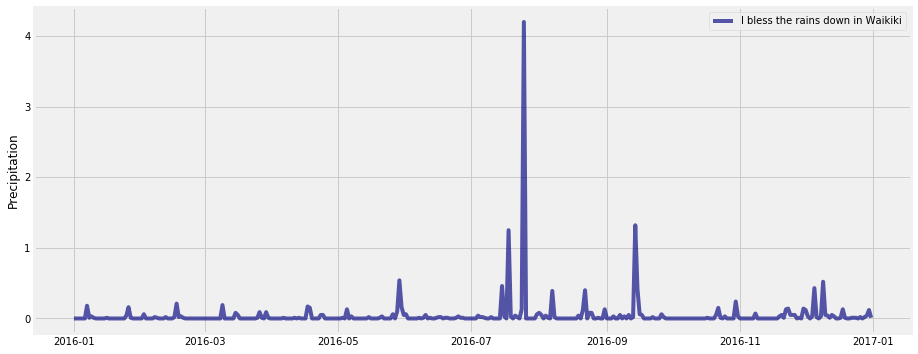

<Figure size 432x288 with 0 Axes>

In [26]:
plt.figure(figsize=(14,6))
plt.plot(waikiki2016['date'], waikiki2016['prcp'], color='navy', alpha=.65, label='I bless the rains down in Waikiki')

plt.ylabel("Precipitation")
plt.legend()
plt.show()
plt.savefig("Output/Waikiki-Rain-2016.png")

In [27]:
kaneohe['date'] = pd.to_datetime(kaneohe['date'])
kaneohe2016 = kaneohe[kaneohe['date'].dt.year == 2016] 
kaneohe2016prcp = kaneohe2016['prcp'].sum()

kualoa['date'] = pd.to_datetime(kualoa['date'])
kualoa2016 = kualoa[kualoa['date'].dt.year == 2016]
kualoa2016prcp = kualoa2016['prcp'].sum()

pearlcity['date'] = pd.to_datetime(pearlcity['date'])
pearlcity2016 = pearlcity[pearlcity['date'].dt.year == 2016]
pearlcity2016prcp = pearlcity2016['prcp'].sum()

# no 2016 data for upper wahiawa
# uppwahiawa['date'] = pd.to_datetime(uppwahiawa['date'])
# uppwahiawa2016 = uppwahiawa[uppwahiawa['date'].dt.year == 2016] 

waimanalo['date'] = pd.to_datetime(waimanalo['date'])
waimanalo2016 = waimanalo[waimanalo['date'].dt.year == 2016]
waimanalo2016prcp = waimanalo2016['prcp'].sum()

waihee['date'] = pd.to_datetime(waihee['date'])
waihee2016 = waihee[waihee['date'].dt.year == 2016]
waihee2016prcp = waihee2016['prcp'].sum()

# no 2016 data for honolulu
# honolulu['date'] = pd.to_datetime(honolulu['date'])
# honolulu2016 = honolulu[honolulu['date'].dt.year == 2016] 

manoa['date'] = pd.to_datetime(manoa['date'])
manoa2016 = manoa[manoa['date'].dt.year == 2016]
manoa2016prcp = manoa2016['prcp'].sum()

In [28]:
stations = ['waikiki','kaneohe','kualoa','pearlcity','waimanalo','waihee','manoa']
prcp = [waikiki2016prcp, kaneohe2016prcp, kualoa2016prcp, pearlcity2016prcp, waimanalo2016prcp, waihee2016prcp, manoa2016prcp]


stationprcp_df = pd.DataFrame({
    'Station': stations,
    'Precipitation': prcp
})
stationprcp_df

,Station,Precipitation
0,waikiki,131.62
1,kaneohe,52.15
2,kualoa,27.29
3,pearlcity,2.97
4,waimanalo,30.77
5,waihee,79.89
6,manoa,162.88


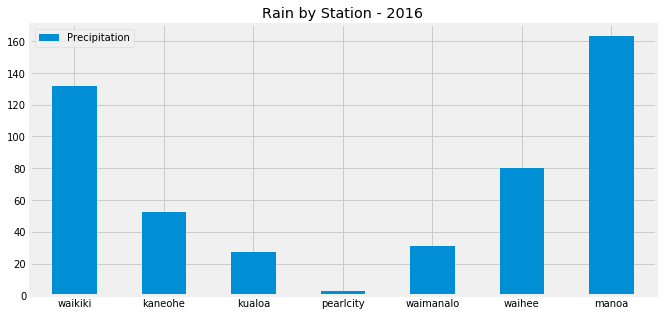

<Figure size 432x288 with 0 Axes>

In [29]:
stationprcp_df.plot(kind='bar', figsize=(10,5), rot=0)
plt.title('Rain by Station - 2016')
plt.xticks(np.arange(len(stations)), stations)
plt.show()
plt.tight_layout()
plt.savefig("Output/RainByStation.png")

# Exploratory Climate Analysis

In [30]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


![precipitation](Images/precipitation.png)

In [31]:
# Use Pandas to calcualte the summary statistics for the precipitation data

![describe](Images/describe.png)

In [32]:
# Design a query to show how many stations are available in this dataset?


In [33]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [34]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


In [35]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


![precipitation](Images/station-histogram.png)

In [36]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [37]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [38]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [39]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [40]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [41]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [42]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [43]:
# Plot the daily normals as an area plot with `stacked=False`
